In [1]:
from utils import convert_boardtomatrix
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import re
from sklearn.model_selection import train_test_split





def filter_string(str_arr, regex): 
    p = re.compile(regex)
    return [ s for s in str_arr if p.match(s) ]

In [2]:
df = pd.read_csv('data/train.csv')

In [3]:
start_cols = filter_string(df.columns, 'start')
stop_cols = filter_string(df.columns, 'stop')

In [4]:
X = df[start_cols][:10000].to_numpy()
Y = df[stop_cols][:10000].to_numpy()

In [34]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)
x_train = x_train.reshape([-1, 25, 25, 1])
x_test = x_test.reshape([-1, 25, 25, 1])

In [58]:
from tensorflow.keras import models, layers, losses
def build_CNN():
    model = models.Sequential()
    model.add(layers.Conv2D(8, (3, 3), activation='relu', input_shape=(25, 25, 1)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(16, (2, 2), activation='relu'))
    model.add(layers.Flatten())
    model.add(layers.Dense(625, activation='sigmoid'))
    model.compile(optimizer='adam',
              loss='MSE',
              metrics=['accuracy'])
    return model

In [59]:
model = build_CNN()
model.summary()

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_36 (Conv2D)           (None, 23, 23, 8)         80        
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 11, 11, 8)         0         
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 10, 10, 16)        528       
_________________________________________________________________
flatten_15 (Flatten)         (None, 1600)              0         
_________________________________________________________________
dense_15 (Dense)             (None, 625)               1000625   
Total params: 1,001,233
Trainable params: 1,001,233
Non-trainable params: 0
_________________________________________________________________


In [60]:
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
219/219 [==============================] - 3s 14ms/step - loss: 0.1297 - accuracy: 0.0027 - val_loss: 0.1152 - val_accuracy: 0.0070
Epoch 2/10
219/219 [==============================] - 3s 14ms/step - loss: 0.1119 - accuracy: 0.0093 - val_loss: 0.1104 - val_accuracy: 0.0110
Epoch 3/10
219/219 [==============================] - 3s 14ms/step - loss: 0.1071 - accuracy: 0.0104 - val_loss: 0.1089 - val_accuracy: 0.0123
Epoch 4/10
219/219 [==============================] - 3s 14ms/step - loss: 0.1036 - accuracy: 0.0111 - val_loss: 0.1085 - val_accuracy: 0.0083
Epoch 5/10
219/219 [==============================] - 3s 14ms/step - loss: 0.1003 - accuracy: 0.0134 - val_loss: 0.1092 - val_accuracy: 0.0107
Epoch 6/10
219/219 [==============================] - 3s 14ms/step - loss: 0.0970 - accuracy: 0.0159 - val_loss: 0.1102 - val_accuracy: 0.0143
Epoch 7/10
219/219 [==============================] - 3s 14ms/step - loss: 0.0936 - accuracy: 0.0170 - val_loss: 0.1123 - val_accuracy: 0.0113

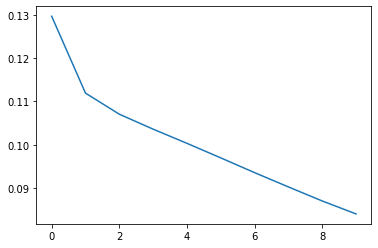

In [64]:
plt.plot(history.history['loss'])